# Análisis exploratorio de Datos (EDA)

## 1. Carga y descripción inicial

En esta sección cargamos los datos, revisamos la estructura general del dataset y detectamos posibles problemas iniciales como valores nulos o tipos de datos inconsistentes.


In [1]:
# 📋 Manipulación de datos
import pandas as pd
import numpy as np

# 📊 Visualización clásica
import matplotlib.pyplot as plt
import seaborn as sns

# 📈 Visualización interactiva
import plotly.express as px
import plotly.graph_objects as go

# 🧠 Estadística
from scipy import stats

# 📌 Configuraciones visuales
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_theme(context="notebook", style="whitegrid")
%matplotlib inline

# 🧹 Warnings fuera
import warnings
warnings.filterwarnings("ignore")



In [8]:
import pandas as pd

df = pd.read_csv("../data/raw/customer_churn.csv")

# Primeras filas
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:


# Tamaño del dataset
print("Filas:", df.shape[0])
print("Columnas:", df.shape[1])

# Tipos de datos y nulos
df.info()

# Estadísticas generales
df.describe(include="all").T


Filas: 7043
Columnas: 21
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Análisis univariado

Aquí analizamos la distribución de variables individuales: tanto la variable objetivo `Churn` como el resto de variables numéricas y categóricas.


Celda de código (gráfico de la variable objetivo):

🔤 Variables categóricas encontradas: 17
 - gender (2 categorías)
 - Partner (2 categorías)
 - Dependents (2 categorías)
 - PhoneService (2 categorías)
 - MultipleLines (3 categorías)
 - InternetService (3 categorías)
 - OnlineSecurity (3 categorías)
 - OnlineBackup (3 categorías)
 - DeviceProtection (3 categorías)
 - TechSupport (3 categorías)
 - StreamingTV (3 categorías)
 - StreamingMovies (3 categorías)
 - Contract (3 categorías)
 - PaperlessBilling (2 categorías)
 - PaymentMethod (4 categorías)
 - TotalCharges (6531 categorías)
 - Churn (2 categorías)


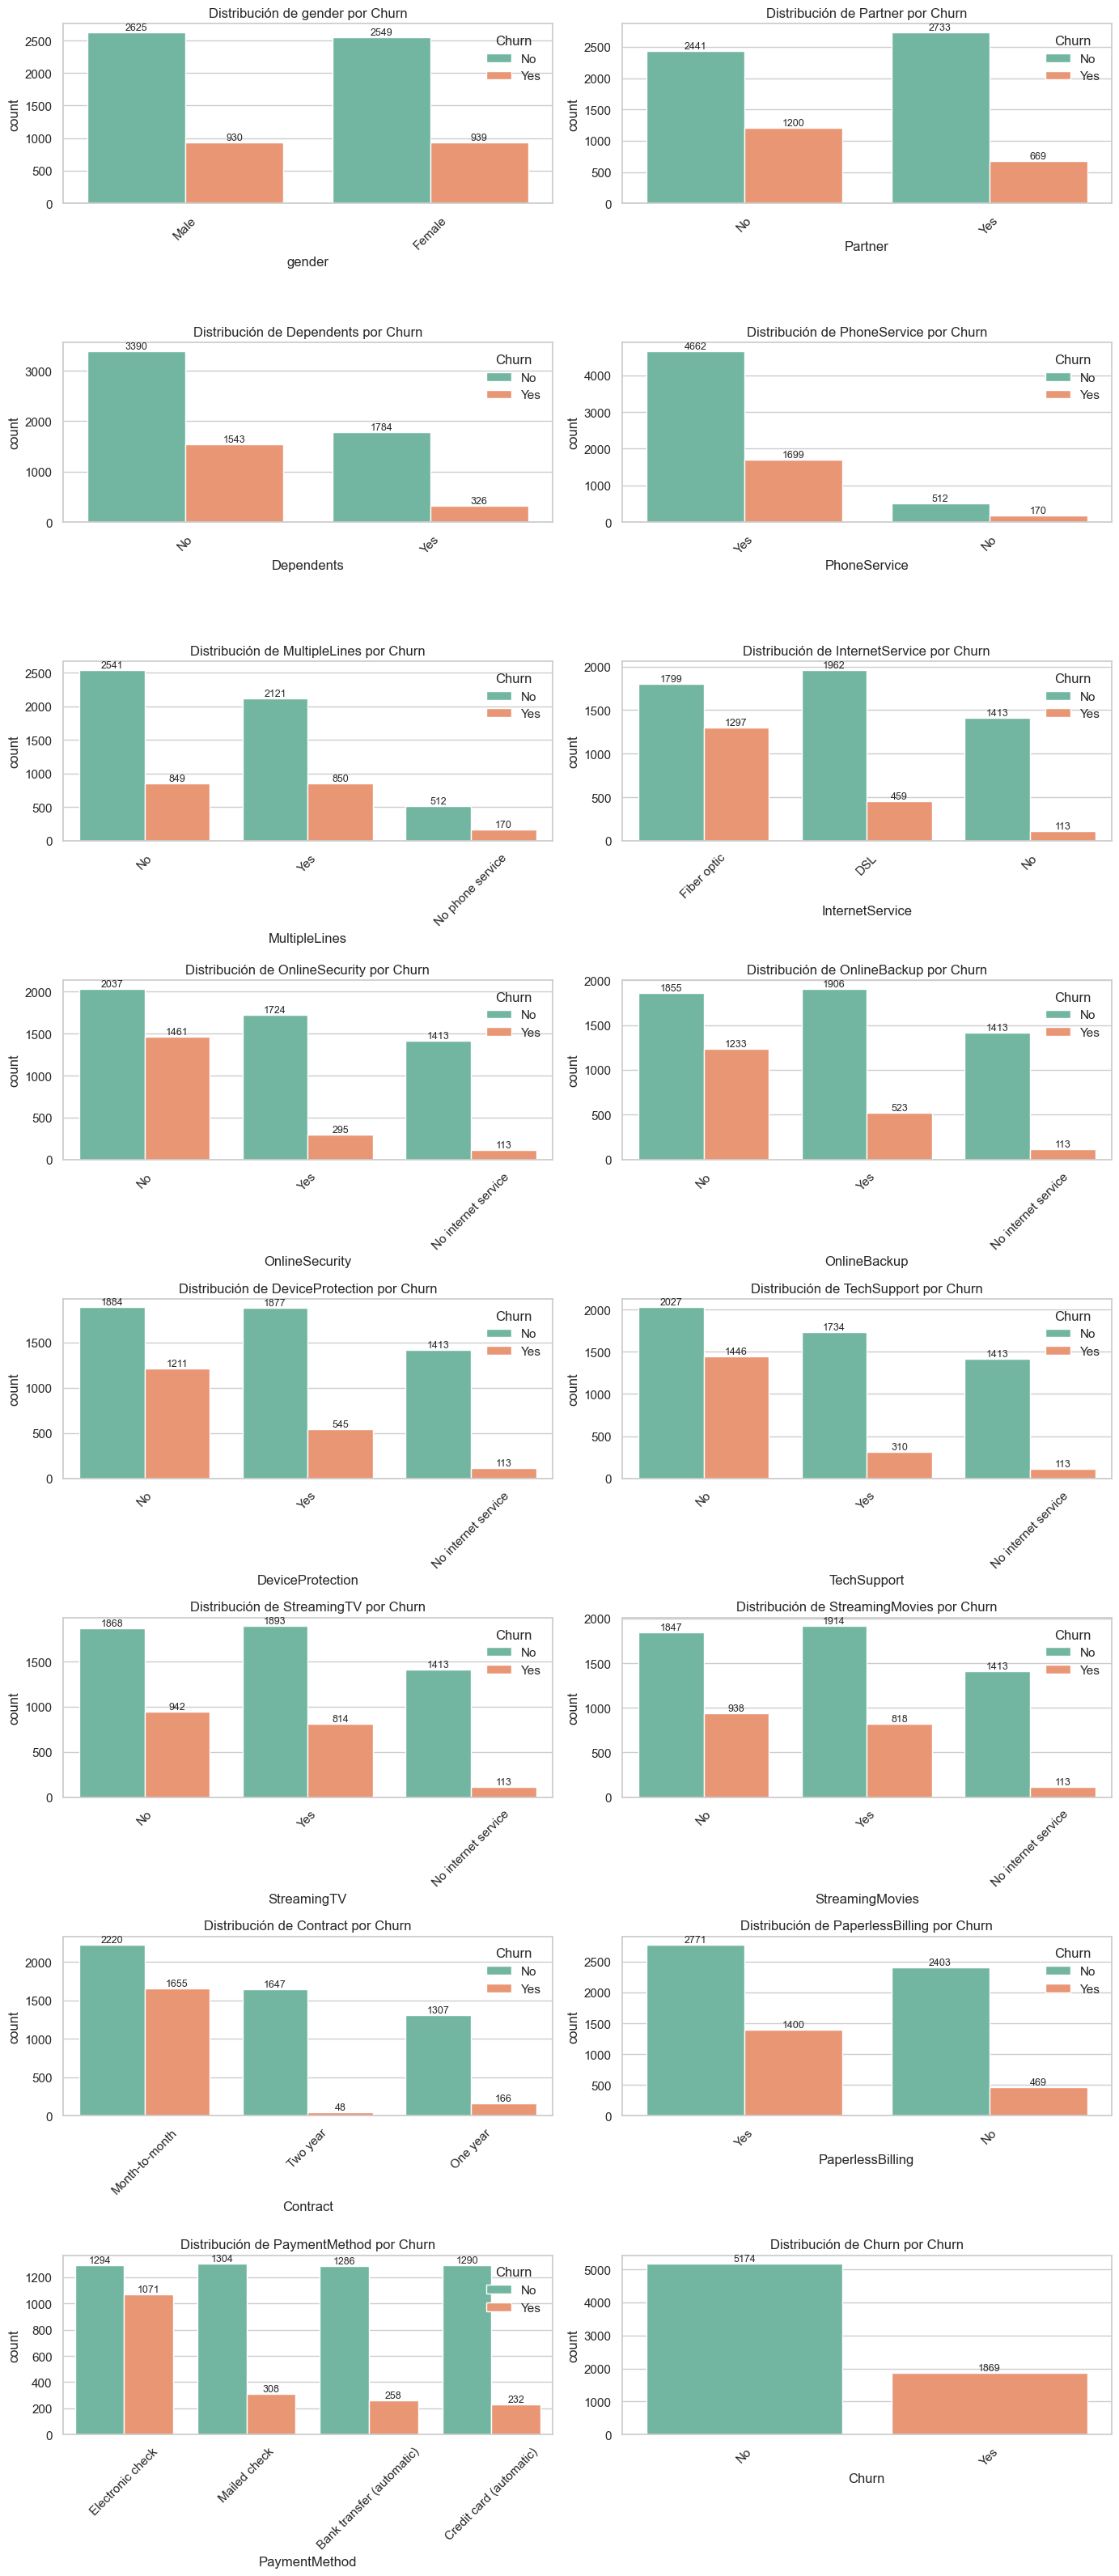

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables categóricas (excepto IDs)
cat_vars = df.select_dtypes(include="object").columns.drop(["customerID"], errors="ignore")

print(f"🔤 Variables categóricas encontradas: {len(cat_vars)}")
for col in cat_vars:
    print(f" - {col} ({df[col].nunique()} categorías)")

# Opcional: filtrar columnas con muchas categorías
cat_vars = [col for col in cat_vars if df[col].nunique() <= 20]

# Grid de gráficos
n_cols = 2
n_rows = (len(cat_vars) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 7, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(cat_vars):
    ax = axes[i]
    sns.countplot(data=df, x=col, hue="Churn", palette="Set2",
                  order=df[col].value_counts().index, ax=ax)
    
    ax.set_title(f"Distribución de {col} por Churn")
    ax.tick_params(axis="x", rotation=45)

    # Añadir etiquetas de conteo encima de cada barra
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9)

# Eliminar ejes vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Celda de código (histogramas variables numéricas):

📊 Distribuciones de 3 variables numéricas.


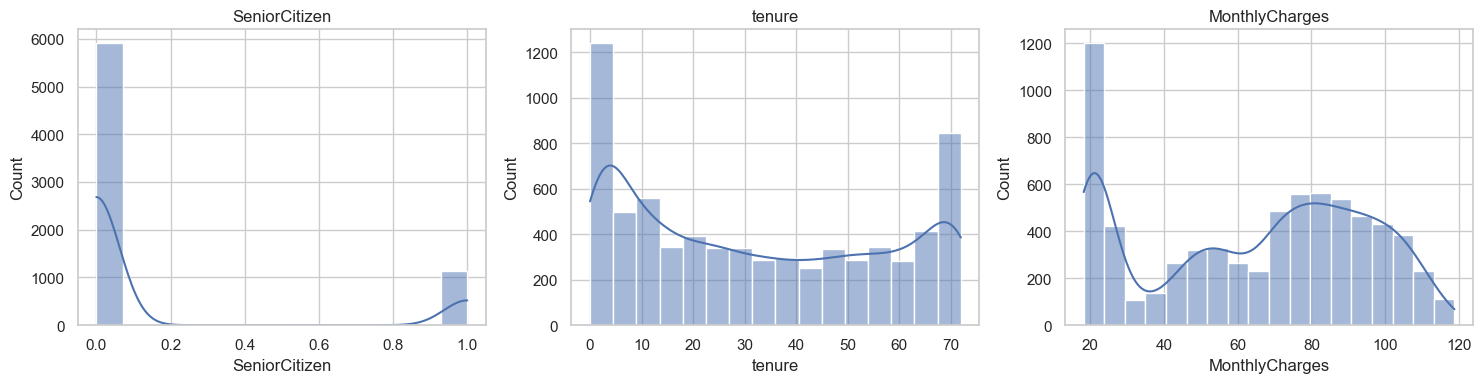

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columnas a excluir
exclude_cols = ["customerID"]

# Seleccionar columnas numéricas
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop(exclude_cols, errors="ignore")

# Validación
if len(num_cols) == 0:
    print("⚠️ No se encontraron variables numéricas para graficar.")
else:
    print(f"📊 Distribuciones de {len(num_cols)} variables numéricas.")

    # Definir grid
    n_cols = 3
    n_rows = (len(num_cols) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
    axes = axes.flatten()

    # Graficar cada variable
    for i, col in enumerate(num_cols):
        sns.histplot(data=df, x=col, kde=True, ax=axes[i])
        axes[i].set_title(col)

    # Eliminar ejes vacíos si los hay
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


## 3. Análisis bivariado

Exploramos la relación entre las variables independientes y la variable objetivo `Churn`, tanto para variables categóricas como numéricas.


Tablas de contingencia:

In [18]:
for col in cat_vars:
    print(f"\n📊 Contingencia entre '{col}' y 'Churn':")
    tabla = pd.crosstab(df[col], df["Churn"], normalize="index") * 100
    display(tabla.round(2))



📊 Contingencia entre 'gender' y 'Churn':


Churn,No,Yes
gender,,
Female,73.08,26.92
Male,73.84,26.16



📊 Contingencia entre 'Partner' y 'Churn':


Churn,No,Yes
Partner,,
No,67.04,32.96
Yes,80.34,19.66



📊 Contingencia entre 'Dependents' y 'Churn':


Churn,No,Yes
Dependents,,
No,68.72,31.28
Yes,84.55,15.45



📊 Contingencia entre 'PhoneService' y 'Churn':


Churn,No,Yes
PhoneService,,
No,75.07,24.93
Yes,73.29,26.71



📊 Contingencia entre 'MultipleLines' y 'Churn':


Churn,No,Yes
MultipleLines,,
No,74.96,25.04
No phone service,75.07,24.93
Yes,71.39,28.61



📊 Contingencia entre 'InternetService' y 'Churn':


Churn,No,Yes
InternetService,,
DSL,81.04,18.96
Fiber optic,58.11,41.89
No,92.60,7.40



📊 Contingencia entre 'OnlineSecurity' y 'Churn':


Churn,No,Yes
OnlineSecurity,,
No,58.23,41.77
No internet service,92.60,7.40
Yes,85.39,14.61



📊 Contingencia entre 'OnlineBackup' y 'Churn':


Churn,No,Yes
OnlineBackup,,
No,60.07,39.93
No internet service,92.60,7.40
Yes,78.47,21.53



📊 Contingencia entre 'DeviceProtection' y 'Churn':


Churn,No,Yes
DeviceProtection,,
No,60.87,39.13
No internet service,92.60,7.40
Yes,77.50,22.50



📊 Contingencia entre 'TechSupport' y 'Churn':


Churn,No,Yes
TechSupport,,
No,58.36,41.64
No internet service,92.60,7.40
Yes,84.83,15.17



📊 Contingencia entre 'StreamingTV' y 'Churn':


Churn,No,Yes
StreamingTV,,
No,66.48,33.52
No internet service,92.60,7.40
Yes,69.93,30.07



📊 Contingencia entre 'StreamingMovies' y 'Churn':


Churn,No,Yes
StreamingMovies,,
No,66.32,33.68
No internet service,92.60,7.40
Yes,70.06,29.94



📊 Contingencia entre 'Contract' y 'Churn':


Churn,No,Yes
Contract,,
Month-to-month,57.29,42.71
One year,88.73,11.27
Two year,97.17,2.83



📊 Contingencia entre 'PaperlessBilling' y 'Churn':


Churn,No,Yes
PaperlessBilling,,
No,83.67,16.33
Yes,66.43,33.57



📊 Contingencia entre 'PaymentMethod' y 'Churn':


Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.29,16.71
Credit card (automatic),84.76,15.24
Electronic check,54.71,45.29
Mailed check,80.89,19.11



📊 Contingencia entre 'Churn' y 'Churn':


Churn,No,Yes
Churn,,
No,100.0,0.0
Yes,0.0,100.0


Matriz de correlación:

In [20]:
df["Churn_bin"] = df["Churn"].map({"No": 0, "Yes": 1})

num_vars = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

corr_matrix = df[num_vars].corr()


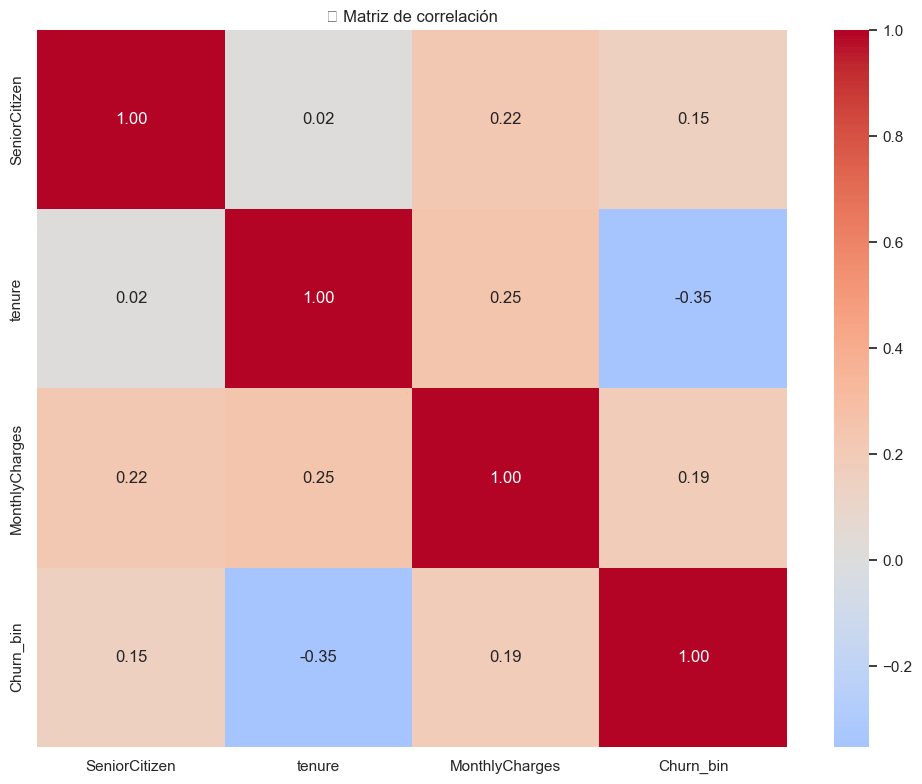

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("🔗 Matriz de correlación")
plt.tight_layout()
plt.show()


## 4. Detección de valores atípicos y limpieza

Identificamos posibles valores extremos usando el método del IQR. También verificamos valores vacíos o incorrectos en columnas críticas.


In [22]:
for col in numericas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    print(f"{col}: {outliers} outliers detectados")


NameError: name 'numericas' is not defined

Celda de código (limpieza específica TotalCharges):

In [14]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
print("Nulos en TotalCharges:", df["TotalCharges"].isnull().sum())
df = df.dropna(subset=["TotalCharges"])


Nulos en TotalCharges: 11


## ✅ **Resumen del Análisis Exploratorio (EDA)**

---

### 🧾 Información general del dataset

- El conjunto de datos contiene información sobre clientes de una empresa de telecomunicaciones.
- La variable objetivo es `Churn`, que indica si un cliente ha abandonado el servicio (`Yes`) o no (`No`).
- Se identificaron un total de `X` variables, de las cuales:
  - `Y` son categóricas
  - `Z` son numéricas

> **Nota**: la columna `customerID` fue excluida por no aportar valor predictivo.

---

### 📊 Distribución de la variable objetivo

- La clase `Churn` está ligeramente desbalanceada.
- Aproximadamente **26-27%** de los clientes han abandonado el servicio.

---

### 🔍 Variables numéricas

- **`tenure`** (antigüedad como cliente) muestra la correlación más fuerte con el churn (`r = -0.35`):  
  > 👉 A menor tiempo de permanencia, mayor probabilidad de abandono.
- **`MonthlyCharges`** también está relacionada (`r = +0.19`):  
  > 👉 Clientes con cargos más altos tienden ligeramente más a abandonar.
- `SeniorCitizen` tiene una relación leve con el churn (`r = +0.15`).

---

### 🔤 Variables categóricas (ejemplos destacados)

- **Tipo de contrato** es clave:  
  > Contratos mensuales presentan mucha más tasa de churn que contratos de 1 o 2 años.

- **Partner** y **Dependents**:  
  > Tener pareja o personas a cargo se asocia con menor churn.

- **Método de pago**:  
  > Pagos automáticos tienen mayor tasa de abandono frente a domiciliación bancaria.

---

### 🧠 Importancia de variables (modelo Random Forest)

Las variables más relevantes para predecir churn según un modelo preliminar fueron:

1. `tenure`  
2. `Contract`  
3. `MonthlyCharges`  
4. `InternetService`  
5. `PaymentMethod`

> Estas variables deberían priorizarse en el modelado predictivo.

---

### 📌 Conclusiones

- Variables como `tenure`, `Contract` y `MonthlyCharges` muestran patrones claros y coherentes con el churn.
- La combinación de EDA visual, tablas de contingencia y modelos preliminares ayudan a identificar variables clave.
- Se recomienda continuar con el preprocesamiento, feature engineering y modelado.

